# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [57]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[num_test/2:], newsgroups_test.target[num_test/2:]
dev_data, dev_labels = newsgroups_test.data[:num_test/2], newsgroups_test.target[:num_test/2]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print 'training label shape:', train_labels.shape
print 'test label shape:', test_labels.shape
print 'dev label shape:', dev_labels.shape
print 'labels names:', newsgroups_train.target_names

training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


(1) For each of the first 5 training examples, print the text of the message along with the label.

In [4]:
def P1(num_examples=5):

### STUDENT START ###
    for i in range (0,num_examples):
        print 'Message # %1d :'% (i+1)
        print 'Category: %s'% (newsgroups_train.target_names[train_labels[i]])
        print train_data[i]
        print ''   
### STUDENT END ###
P1()

    
    



Message # 1 :
Category: comp.graphics
Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych

Message # 2 :
Category: talk.religion.misc


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corru

(2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

In [5]:
def P2():


### STUDENT START ###

### Vectorize train_data and call it matrix X
    vectorizer = CountVectorizer(min_df=1)
    X = vectorizer.fit_transform(train_data)

### Matrix X columns denote the size of features (vocabulary) and X rows represent the number of examples
    size_vocab = (X.shape[1])
    num_examples = (X.shape[0])

### We use function .nnz to find number o nonzero values
    non_zero = X.nnz

### Get the average number of words per example 
    avg_non_zero_per_example = float(non_zero/num_examples)

### Calculate the percentage of nonzero entries in the X matrix
    fraction_non_zero = float(avg_non_zero_per_example/size_vocab)*100

### Get feature names and assigned it to a variable feature_names (this is the sample vocabulary)
    feature_names = vectorizer.get_feature_names()

### Let's create our own vocabulary containing only 4 words
    own_vocab = ["atheism", "graphics", "space", "religion"]

### Let's find the columns in X that match our own vocabulary
    find_column = [0,0,0,0]
    for j in range(size_vocab):
        for k in range (len(own_vocab)):
            find_column[k] = vectorizer.vocabulary_.get(own_vocab[k])

### Let's define a matrix Z that only includes our own vocabulary                
    Z = np.zeros((len(train_data),len(own_vocab)))
    own_non_zero = 0
    for i in range(len(train_data)):
        for k in range(len(own_vocab)):
            Z[i,k] = X[i,find_column[k]]
            if Z[i,k]!= 0: own_non_zero += 1

### Let's calculate the average number of words per example for our own vocabulary                
    own_avg_non_zero_per_example = float(own_non_zero)/float(num_examples)

### Let's now use a new vocabulary that extracts bigram and trigram character features
    bigram_vectorizer = CountVectorizer(ngram_range=(2, 3), token_pattern=r'\b\w+\b', min_df=1)
    analyze = bigram_vectorizer.build_analyzer()
    X_2 = bigram_vectorizer.fit_transform(train_data).toarray()

### Let's calculate the size of a bigram and trigram extraction vocabulary
    bitri_size_vocab = X_2.shape[1]

### Let's now only consider as features words that appear in at least 10 documents
    ten_vectorizer = CountVectorizer(min_df=10)
    X_10 = ten_vectorizer.fit_transform(train_data)

### Let's calculate the size of a vocabulary that only includes words that appear in at least 10 documents
    ten_size_vocab = (X_10.shape[1])

### Vectorize the development data in matrix X_dev
    X_dev = vectorizer.fit_transform(dev_data)

### Let's examine each feature and compared the vocabularies from train and dev data
    dev_feature_names = vectorizer.get_feature_names()
    common_words_sum = 0
    for i in range(X.shape[1]):
        for j in range(X_dev.shape[1]):
            if feature_names[i]== dev_feature_names[j]: common_words_sum += 1

### Calculate the fraction of the words in the dev data that are missing from the vocabulary
    num_missing_words = X_dev.shape[1] - common_words_sum
    fraction_missing_words = float(num_missing_words)/float(X_dev.shape[1])*100


### Print out all answers
    print '2a) Size of vocabulary: %6d' %size_vocab
    print '2a) Average number of non_zero features per example: %3d'% avg_non_zero_per_example
    print '2a) Fraction of the entries in the matrix are non-zero: %3.2f%% '%fraction_non_zero
    print '2b) First feature is: %s'% feature_names[0]
    print '2b) Last feature is: %s'% feature_names[size_vocab-1]
    print '2c) Now the training vector shape is:', Z.shape
    print '2c) Now the average number of non_zero features per example is: %3.2f'%own_avg_non_zero_per_example
    print '2d) Extracting bigram and trigram character features takes our vocabulary to: %6d' %bitri_size_vocab
    print '2e) Considering words that appear in at least 10 documents takes our vocabulary to: %6d' %ten_size_vocab
    print '2f) The fraction of words in the dev data that are missing from the vocabulary is: %3.2f%%' %fraction_missing_words

### STUDENT END ###

P2()

2a) Size of vocabulary:  26879
2a) Average number of non_zero features per example:  96
2a) Fraction of the entries in the matrix are non-zero: 0.36% 
2b) First feature is: 00
2b) Last feature is: zyxel
2c) Now the training vector shape is: (2034, 4)
2c) Now the average number of non_zero features per example is: 0.27
2d) Extracting bigram and trigram character features takes our vocabulary to: 525855
2e) Considering words that appear in at least 10 documents takes our vocabulary to:   3064
2f) The fraction of words in the dev data that are missing from the vocabulary is: 24.79%


(3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

In [8]:
def P3():
### STUDENT START ###


#### Let's train the vectorizer function applying CountVectorizer to train_data and define its labels
    vectorizer = CountVectorizer(min_df=1)
    X, y = vectorizer.fit_transform(train_data), train_labels

#### Let's transform dev_data into a vector using CountVectorizer and define the true labels to check against
    X_dev, y_true = vectorizer.transform(dev_data), dev_labels

#### Let's define a K nearest neighbor classifier testing Ks from 1 to 10 and fining the optimal
    k_values, max_knn_f1, max_k =  np.arange(1,11), 0, 0
    for i in range (len(k_values)):
        knn = KNeighborsClassifier(n_neighbors=k_values[i])
        knn.fit(X, y) 
        y_pred = knn.predict(X_dev)
        if metrics.f1_score(y_true, y_pred, average ='weighted') > max_knn_f1: 
            max_knn_f1 = metrics.f1_score(y_true, y_pred, average ='weighted')
            max_k = k_values[i]

#### Let's now define a MultiNomial classifier testing certain alphas and finding the optimal
    alphas = [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]
    max_mn_f1, max_alpha = 0,0
    for i in range(len(alphas)):
        mn = MultinomialNB(alpha=alphas[i])
        mn.fit(X,y)
        y_pred = mn.predict(X_dev)
        if metrics.f1_score(y_true, y_pred, average ='weighted') > max_mn_f1:
            max_mn_f1 = metrics.f1_score(y_true, y_pred, average ='weighted')
            max_alpha = alphas[i]

#### Let's now define a Logistic classifier testing certain Cs and finding the optimal
    c_values = [0.2, 0.3, 0.4, 0.5, 0.6]
    max_lr_f1, max_c = 0,0
    ss_by_class = np.zeros((4,len(c_values)))
    for c in range(len(c_values)):
        lr = LogisticRegression(C=c_values[c])
        lr.fit(X,y)
        y_pred = lr.predict(X_dev)
        if metrics.f1_score(y_true, y_pred,average ='weighted') > max_lr_f1:
            max_lr_f1 = metrics.f1_score(y_true, y_pred, average ='weighted')
            max_c = c_values[c]
#### Let's see the relationship between Cs and the corresponding coefficients of each class
        coef_matrix = lr.coef_
        for i in range(coef_matrix.shape[0]):
            for j in range(coef_matrix.shape[1]):
                ss_by_class[i,c] += coef_matrix[i,j]**2 
        

        


    print '2a) The optimal value for k is %2d and its corresponding F1 score is %4.2f' %(max_k, max_knn_f1)
    print '2b) Using a Naive Bayes Multinomial classifier:'
    print 'The optimal value for alpha is %3.2f and its corresponding F1 score is %4.2f' %(max_alpha, max_mn_f1)
    print 'Using a Logistic Regression classifier:'
    print 'The optimal value for C is %3.2f and its corresponding F1 score is %4.2f' %(max_c, max_lr_f1)
    print '2c)Here''s the c values considered:'
    print c_values
    print 'and its corresponding sum of squared values for each class:'
    print ss_by_class


### STUDENT END ###
P3()


2a) The optimal value for k is  7 and its corresponding F1 score is 0.45
2b) Using a Naive Bayes Multinomial classifier:
The optimal value for alpha is 0.10 and its corresponding F1 score is 0.79
Using a Logistic Regression classifier:
The optimal value for C is 0.30 and its corresponding F1 score is 0.71
2c)Heres the c values condidered:
[0.2, 0.3, 0.4, 0.5, 0.6]
and its corresponding sum of squared values for each class:
[[  49.74967458   69.27702155   86.73631242  102.59743971  117.23367338]
 [  42.74064504   57.88697936   71.1126225    83.09094079   94.07966549]
 [  49.32426872   67.90716202   84.26173608   99.0172645   112.52611041]
 [  42.6702114    59.77735917   75.05021188   89.00720041  101.84335215]]


ANSWER:

a. Why doesn't nearest neighbors work well for this problem?

KNearest Neighbor does not work well because the bag of words method arranges words in alphabeticall order.Using a word that is close to another one in alphabetical order bears no relationship in covering similar topics. 


b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

Logistic regression calculates the likelihood of each class considering the coefficients assigned to each word. There are many words that are simply used in any topic. Longer messages containing more words may lead to wrong conclusions since all words are treated equally. In multinomial Naive Bayes the model makes a distinction based on the number of times a specific word is repeated. This allows the model to make better predictions as certain dominant words are given more weight for certain topics.

c. Logistic regression estimates a weight vector for each class, which you can access with the coef_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

As the value of C increases so does the value of the sum of squares. C measures the inverse of the regularization strength. As C increases, regularization strength is diminished. As regularization strength is diminished overfitting is more likely and consequently each feature is given a higher coefficient than it actually deserves. 


(4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

In [7]:
def P4():
### STUDENT START ###

#### Let's train the vectorizer function applying CountVectorizer to train_data and define its labels
    vectorizer = CountVectorizer(min_df=1)    
    X, y = vectorizer.fit_transform(train_data), train_labels
    feature_names = vectorizer.get_feature_names()


#### Let's train a logistic regression model
    lr = LogisticRegression(C=0.3)
    lr.fit(X,y)
    coef_matrix = lr.coef_


### Let's sort the results of the coefficients for the first category of labels
    results = []       
    for j in range (coef_matrix.shape[1]):
        result = {
                'index': j,
                'coef': coef_matrix[0,j]**2
        }
        results.append(result)
    sorted_results_label_1 = sorted(results, lambda a,b: 1 if a['coef'] < b['coef'] else -1)


### Let's sort the results of the coefficients for the second category of labels
    results = []       
    for j in range (coef_matrix.shape[1]):
        result = {
                'index': j,
                'coef': coef_matrix[1,j]**2
        }
        results.append(result)
    sorted_results_label_2 = sorted(results, lambda a,b: 1 if a['coef'] < b['coef'] else -1)
    

### Let's sort the results of the coefficients for the third category of labels
    results = []       
    for j in range (coef_matrix.shape[1]):
        result = {
                'index': j,
                'coef': coef_matrix[2,j]**2
        }
        results.append(result)
    sorted_results_label_3 = sorted(results, lambda a,b: 1 if a['coef'] < b['coef'] else -1)
    
### Let's sort the results of the coefficients for the fouth category of labels
    results = []       
    for j in range (coef_matrix.shape[1]):
        result = {
                'index': j,
                'coef': coef_matrix[3,j]**2
        }
        results.append(result)
    sorted_results_label_4 = sorted(results, lambda a,b: 1 if a['coef'] < b['coef'] else -1)
    
### Let's get the the index for top 5 features for each label
    list_index = []
### Top 5 from label 1
    top_features = np.zeros((5,2))
    for i in range (5):
        top_features[i] = (list(sorted_results_label_1[i].values()))
        index = top_features[i,0].astype(int)
        list_index.append(index)

### Top 5 from label 2
    top_features = np.zeros((5,2))
    for i in range (5):
        top_features[i] = (list(sorted_results_label_2[i].values()))
        index = top_features[i,0].astype(int)
        list_index.append(index)

### Top 5 from label 3
    top_features = np.zeros((5,2))
    for i in range (5):
        top_features[i] = (list(sorted_results_label_3[i].values()))
        index = top_features[i,0].astype(int)
        list_index.append(index)

### Top 5 from label 4
    top_features = np.zeros((5,2))
    for i in range (5):
        top_features[i] = (list(sorted_results_label_4[i].values()))
        index = top_features[i,0].astype(int)
        list_index.append(index)

#### Let's create a table 20 x 4 that shows the weight for each of the top features for each of the labels
    table_features_names = []
    table_top_features = np.zeros((20,4))
    for i in range(20):
        index = list_index[i]
        table_top_features[i] = [coef_matrix[0,index],coef_matrix[1,index],coef_matrix[2,index],coef_matrix[3,index]]
        table_features_names.append(feature_names[index])
    print 'Here find the print out of the 20 x 4 table showing coefficients for each label for each of the top 5 features:'
    print table_top_features
    print 'See the list of top features:'
    print table_features_names

### STUDENT END ###
vectorizer = CountVectorizer(min_df=1)
P4()
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'\b\w+\b', min_df=1)
P4()

Here find the print out of the 20 x 4 table showing coefficients for each label for each of the top 5 features:
[[-0.9230131  -0.97734867  1.65827818 -0.83875049]
 [ 0.70742012 -0.16905057 -0.24680768 -0.33381454]
 [ 0.70190949 -0.0897005  -0.23071394 -0.50973955]
 [ 0.69296658 -0.43515788 -0.56746704 -0.03438692]
 [ 0.69268915 -0.30449835 -0.3100703  -0.33977281]
 [-0.56181386  1.41349484 -0.94506636 -0.53660507]
 [-0.9230131  -0.97734867  1.65827818 -0.83875049]
 [-0.39497342  0.95543088 -0.56641118 -0.32248974]
 [-0.23903226  0.91587929 -0.59534348 -0.42857083]
 [-0.26312545  0.81095264 -0.48109278 -0.27276197]
 [-0.9230131  -0.97734867  1.65827818 -0.83875049]
 [-0.56181386  1.41349484 -0.94506636 -0.53660507]
 [-0.30559197 -0.48255206  0.86891857 -0.41001633]
 [-0.39557201 -0.36008044  0.7433768  -0.35330656]
 [ 0.05647391 -0.61118258 -0.69533059  0.39014796]
 [-0.9230131  -0.97734867  1.65827818 -0.83875049]
 [-0.40152875 -0.28645947 -0.23362186  0.79379182]
 [-0.51356577 -0.2581

ANSWER:
In the first case, we see that many words that are related to specific topics actually are used to eliminate for certain the possibility of choosing topics that do not use that word. In the second case, we also see something similar happening with the pair of words being used. In general, it looks like there are certain expressions that are really only use for very specific topics so every time you see them you can actually quickly eliminate some of the labels that are not relevant. 
   

(5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

In [9]:
### STUDENT START ###



### Let's choose a set of words that we could eliminate
def empty_preprocessor(s):

    elim_array = ['\sSUCH\s', 
##                 '\sAND\s', 
###                  '\sTHE\s', 
###                  '\sOF\s', 
###                  '\sTO\s', 
##                  ' \sFOR\s', 
###                  '\sTHAT\s', 
                  '\sWAS\s', 
###                  '\sIS\s', 
##                 '\sLIKE\s'
                  ]
    for elim_word in  elim_array:    
        s = re.sub(elim_word,' ', s, flags=re.IGNORECASE)
    return s

### Let's now change some and shorten some words
def better_preprocessor(s):
    s = re.sub('\d', 'num_token ', s)
    s = re.sub('\s?\s | \s!\s' , 'exp_token ', s )
    s = re.sub('\ly' , '', s )
    return s        

def P5():

#### Let's create a new training set with a reduced vocabulary
    new_train_data = []
    for i in range(len(train_data)):
        new_train_data.append(better_preprocessor(empty_preprocessor(train_data[i])))
        
### Let's define the vectorizer and its original X_original matrix
    vectorizer = CountVectorizer(min_df=1)
    X_original = vectorizer.fit_transform(train_data)

### Let's define a new matrix X that uses the reduced vocabulary and calculate our reduction in percentages
    X, y = vectorizer.fit_transform(new_train_data), train_labels
    vocab_perc_change = (1-float(X.shape[1])/float(X_original.shape[1]))*100
    
#### Let's transform dev_data into a vector using CountVectorizer and define the true labels to check against
    X_dev, y_true = vectorizer.transform(dev_data), dev_labels

#### Let's now define a Logistic classifier testing certain Cs and finding the optimal
    c_values = [0.2, 0.3, 0.4, 0.5, 0.6]
    max_lr_f1, max_c = 0,0
    for c in range(len(c_values)):
        lr = LogisticRegression(C=c_values[c])
        lr.fit(X,y)
        y_pred = lr.predict(X_dev)
        if metrics.f1_score(y_true, y_pred,average ='weighted') > max_lr_f1:
            max_lr_f1 = metrics.f1_score(y_true, y_pred, average ='weighted')
            max_c = c_values[c]


#### Let's print out our new results
    print 'Our preprocessing methods decrease the size of our vocabulary by %3.2f %%'%vocab_perc_change
    print 'With that reduction we now have an f1 value of: %3.2f '% max_lr_f1

### STUDENT END ###

P5()




Our preprocessing methods decrease the size of our vocabulary by 2.14 %
With that reduction we now have an f1 value of: 0.72 


(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

Number of learned weights that are not equal to zero when using L1:      896 
Number of learned weights that are not equal to zero when using L1:   107516


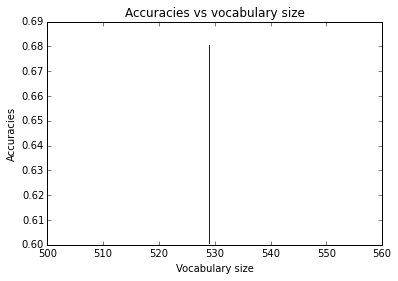

In [41]:
def P6():
    # Keep this random seed here to make comparison easier.
    #np.random.seed(0)

    ### STUDENT START ###


### Let's define a new matrix X that uses the reduced vocabulary and calculate our reduction in percentages
    vectorizer = CountVectorizer(min_df=1)
    X, y = vectorizer.fit_transform(train_data), train_labels

#### Let's transform dev_data into a vector using CountVectorizer and define the true labels to check against
    X_dev, y_true = vectorizer.transform(dev_data), dev_labels


#### Let's apply L1 and L2 penalties to the Logistic Regression of the train_data
    lr_l1 = LogisticRegression(C=0.3, penalty='l1', tol=0.01)
    lr_l2 = LogisticRegression(C=0.3, penalty='l2', tol=0.01)
    lr_l1.fit(X, y)
    lr_l2.fit(X, y)

### Let's find out how many coefficients are zero in each case
    coef_matrix_l1 = lr_l1.coef_
    coef_matrix_l2 = lr_l2.coef_
    count_zeros_l1, count_zeros_l2 = 0,0
    for i in range(coef_matrix_l1.shape[0]):
        for j in range(coef_matrix_l1.shape[1]):
            if coef_matrix_l1[i,j] == 0:
                count_zeros_l1 +=1
            if coef_matrix_l2[i,j] == 0:
                count_zeros_l2 +=1

    non_zero_l1 = coef_matrix_l1.shape[0]*coef_matrix_l1.shape[1]- count_zeros_l1
    non_zero_l2 = coef_matrix_l2.shape[0]*coef_matrix_l2.shape[1]- count_zeros_l2
        
###Let's create a modified X matrix that zeroes out when a coefficient is zero for all labels  
    X_mod = np.zeros((X.shape[0],X.shape[1]))
    for feature in range (coef_matrix_l1.shape[1]):
        coef_sum = 0
        for label in range(coef_matrix_l1.shape[0]):
            coef_sum += coef_matrix_l1[label,feature]
        if coef_sum == 0 : 
            for i in range (X.shape[0]): X_mod[i,feature] = 0
        else:
            for i in range (X.shape[0]): X_mod[i,feature] = X[i,feature]     

#### Let's train a logistic regression with an L2 penalty with the new modified train data
    c_values = [0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.1, 0.5]
    vocabulary = []
    accuracies = []
    for c in range (len(c_values)):
        lr_mod = LogisticRegression(C=c_values[c], penalty='l2', tol=0.01) 
        lr_mod.fit(X_mod, y)
        y_pred = lr_mod.predict(X_dev)
        coef_mod = lr_mod.coef_

### Let's calculate the size of the vocabulary
        wordcount = 0
        for feature in range (coef_mod.shape[1]):
            coef_sum = 0
            for label in range(coef_mod.shape[0]):
                coef_sum += coef_mod[label,feature]
            if coef_sum != 0 : wordcount += 1   
        vocabulary.append(wordcount)
    
### Let's calculate the accuracy
        correct, total = 0, 0
        for pred, label in zip(y_pred, y_true):
            if pred == label: correct += 1
            total += 1
        accuracy = float(correct)/float(total)
        accuracies.append(accuracy)

### Requested output
    print 'Number of learned weights that are not equal to zero when using L1: %8d '% non_zero_l1
    print 'Number of learned weights that are not equal to zero when using L1: %8d'% non_zero_l2
    
### Requested plot
    plt.plot(vocabulary, accuracies)
    plt.title('Accuracies vs vocabulary size')
    plt.ylabel('Accuracies') 
    plt.xlabel('Vocabulary size') 
    plt.show()
    
    ### STUDENT END ###
P6()

(7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

In [61]:
def P7():
### STUDENT START ###

    vectorizer = TfidfVectorizer(min_df=1)

### Let's define a new matrix X that uses the reduced vocabulary and calculate our reduction in percentages

    X, y = vectorizer.fit_transform(train_data), train_labels

#### Let's transform dev_data into a vector using CountVectorizer and define the true labels to check against
    X_dev, y_true = vectorizer.transform(dev_data), dev_labels

    lr_tf = LogisticRegression(C=100) 
    lr_tf.fit(X, y)
    y_pred = lr_tf.predict(X_dev)
    y_prob = lr_tf.predict_proba(X_dev)
    r_list = []       
    for i in range (y_prob.shape[0]):
        for j in range (y_prob.shape[1]):
            max_prob = 0
            if y_prob[i,j] > max_prob: max_prob = y_prob[i,j]
        true_prob = y_prob[i, y_true[i]]     
        r = {
            'index': i,
            'ratio': max_prob / true_prob
        }
        r_list.append(r)

    sorted_r_list = sorted(r_list, lambda a,b: 1 if a['ratio'] < b['ratio'] else -1)   
### Print top three documents
    top_documents = np.zeros((3,2))
    print 'MESSAGES WHERE R IS THE LARGEST'
    for i in range(3):
        top_documents[i] = (list(sorted_r_list[i].values()))
        index = top_documents[i,0].astype(int)
        predicted_label = (categories[y_pred[index].astype(int)])
        true_label =(categories[y_true[index].astype(int)])
        print 'The message ranked in the number %1d position is:'%(i+1)
        print dev_data[index]
        print 'The predicted label was: %s' %predicted_label
        print 'The true label was: %s' %true_label
        print 'The probabilities of the labels were:', y_prob[index]
        print '---------------------------------------------------------------'



## STUDENT END ###
P7()

MESSAGES WHERE R IS THE LARGEST
The message ranked in the number 1 position is:

The 24 children were, of course, killed by a lone gunman in a second story
window, who fired eight bullets in the space of two seconds...

The predicted label was: sci.space
The true label was: alt.atheism
The probabilities of the labels were: [ 0.00242094  0.02006527  0.28226901  0.69524478]
---------------------------------------------------------------
The message ranked in the number 2 position is:
With the Southern Baptist Convention convening this June to consider
the charges that Freemasonry is incompatible with christianity, I thought
the following quotes by Mr. James Holly, the Anti-Masonic Flag Carrier,
would amuse you all...

     The following passages are exact quotes from "The Southern 
Baptist Convention and Freemasonry" by James L. Holly, M.D., President
of Mission and Ministry To Men, Inc., 550 N 10th St., Beaumont, TX 
77706. 
 
     The inside cover of the book states: "Mission & Ministr

ANSWER: The model is having trouble identifying the alt.atheism category. 

(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.